<a href="https://colab.research.google.com/github/KrankVegan/Nuevo-Repositorio/blob/main/Tarea_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tareas del cuaderno sobre Introduccion_tensorflow_keras del Repositorio

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Tarea:** Hacer derivada doble usando gradiente descendiente de TensorFlow

In [8]:
x = tf.linspace(0,10,201)

In [9]:
with tf.GradientTape() as tape:#Primera derivada
  tape.watch(x)
  y = tf.sin(x)

dy_dx = tape.gradient(y,x)

In [10]:
with tf.GradientTape(persistent=True) as tape2: #Derivada doble
    tape2.watch(x)
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = tf.sin(x)
    dy = tape.gradient(y,x)


d2y_dx2 = tape2.gradient(dy,x)

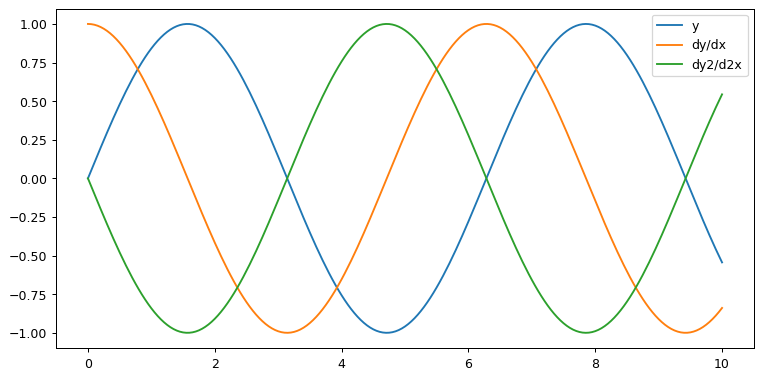

In [12]:
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(x,y,label="y")
plt.plot(x,dy_dx,label="dy/dx")
plt.plot(x,d2y_dx2,label="dy2/d2x")
plt.legend()

**Tarea Clasificador**




In [13]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],
                                                 cov=[
                                                    [1,0.5],
                                                    [0.5,1]
                                                 ],
                                                 size=num_samples_per_class
                                                 )

positive_samples = np.random.multivariate_normal(mean=[1,0.5],
                                                 cov=[
                                                    [1,0.5],
                                                    [0.5,1]
                                                 ] ,
                                                 size=num_samples_per_class
                                                 )

In [14]:
X = np.vstack((negative_samples,positive_samples)).astype(np.float32)


In [15]:
y = np.vstack((
    np.zeros((num_samples_per_class,1),dtype='float32'),
    np.ones((num_samples_per_class,1),dtype='float32')
))

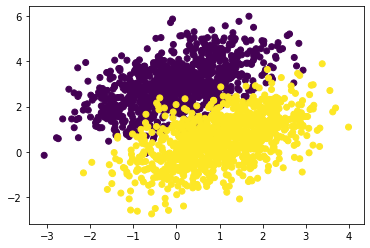

In [16]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])

In [17]:
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [18]:
perc = 0.8
total = len(X)
X_train, y_train = X[:int(total*perc)], y[:int(total*perc)]
X_test, y_test = X[int(total*perc):], y[int(total*perc):]

In [19]:
class Model: 
    def __init__(self,input_dim,output_dim):
        self.W = tf.Variable(initial_value=tf.random.uniform(
            shape=(input_dim,output_dim)
        ))
        self.b = tf.Variable(initial_value=tf.zeros(
            shape=(output_dim,)
        ))

    def __call__(self,X):
        return tf.matmul(X,self.W) + self.b 

model = Model(2,1)

In [20]:
def square_loss(y,y_pred):
    per_samples_losses = tf.square(y-y_pred)
    return tf.reduce_mean(per_samples_losses)

In [21]:
learning_rate = 0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, 
                                                     [model.W,model.b])
    model.W.assign_sub(grad_loss_wrt_W* learning_rate)
    model.b.assign_sub(grad_loss_wrt_b* learning_rate)
    return loss

In [22]:
model = Model(2,1)
for step in range(40):
    loss = training_step(X_train,y_train)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.9436
Loss at step 1: 0.3894
Loss at step 2: 0.3130
Loss at step 3: 0.2716
Loss at step 4: 0.2393
Loss at step 5: 0.2126
Loss at step 6: 0.1904
Loss at step 7: 0.1715
Loss at step 8: 0.1554
Loss at step 9: 0.1417
Loss at step 10: 0.1299
Loss at step 11: 0.1198
Loss at step 12: 0.1112
Loss at step 13: 0.1037
Loss at step 14: 0.0973
Loss at step 15: 0.0918
Loss at step 16: 0.0871
Loss at step 17: 0.0831
Loss at step 18: 0.0796
Loss at step 19: 0.0766
Loss at step 20: 0.0740
Loss at step 21: 0.0718
Loss at step 22: 0.0699
Loss at step 23: 0.0682
Loss at step 24: 0.0668
Loss at step 25: 0.0656
Loss at step 26: 0.0646
Loss at step 27: 0.0637
Loss at step 28: 0.0629
Loss at step 29: 0.0623
Loss at step 30: 0.0617
Loss at step 31: 0.0612
Loss at step 32: 0.0608
Loss at step 33: 0.0604
Loss at step 34: 0.0601
Loss at step 35: 0.0599
Loss at step 36: 0.0596
Loss at step 37: 0.0594
Loss at step 38: 0.0593
Loss at step 39: 0.0591


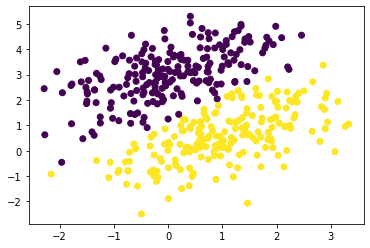

In [23]:
predictions = model(X_test)
y_pred = np.array(predictions > 0.5)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,0])

**Tarea:**




*   ¿Qué tipo de entrenamiento se acabo de hacer?, ¿mini-batch?, ¿batch? 


R: Se hace un entranamiento batch debido a que X_train y y_train no se esta particionando mas cuando se meten al modelo, ni se especifica un tamaño de mini batch, se esta haciendo segun la siguiente imagen:

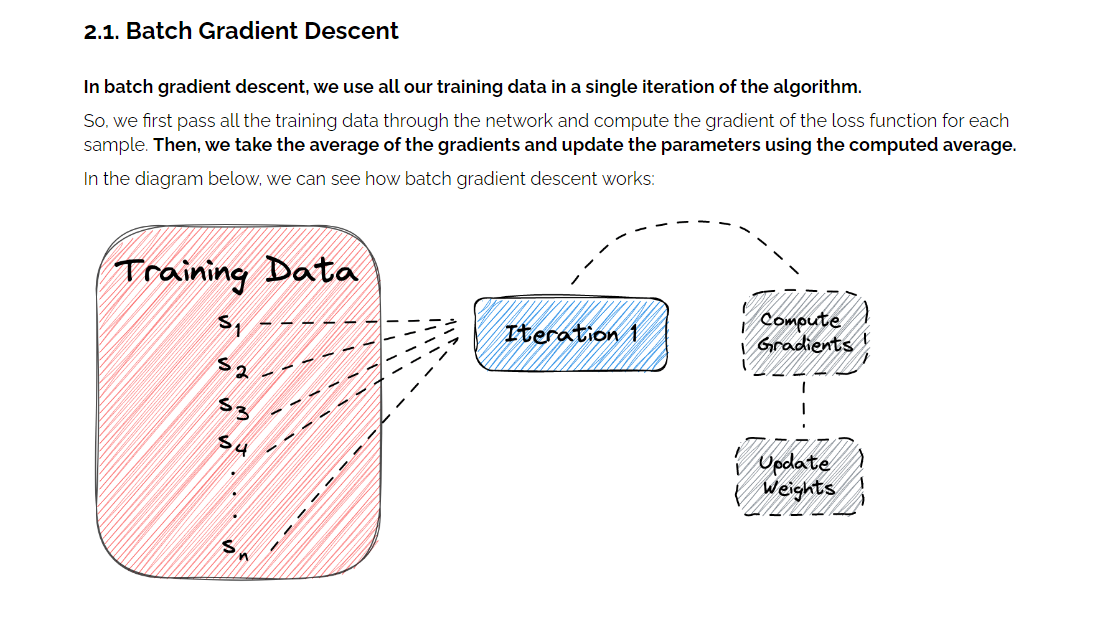

*   Plotear la curva de decisión.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


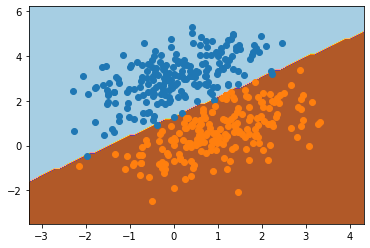

In [24]:
from numpy import where# en base a codigo de https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# generate dataset
# define bounds of the domain
min1, max1 = X_test[:, 0].min()-1, X_test[:, 0].max()+1
min2, max2 = X_test[:, 1].min()-1, X_test[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_test, y_pred)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y_pred == class_value)
	# create scatter of these samples
	pyplot.scatter(X_test[row_ix, 0], X_test[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()

**Tarea de Deep Learning utilizando Keras**

In [28]:
input = tf.keras.layers.Input(shape=(2,))
x_1 = tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh)(input)
x_2 = tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh)(x_1)
y = tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(x_2)

model = tf.keras.Model(input,y)

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics= [tf.keras.metrics.BinaryAccuracy()]
)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=40,
          batch_size=4)

Epoch 1/40
400/400 [==============================] - 2s 3ms/step - loss: 0.4762 - binary_accuracy: 0.8275 - val_loss: 0.4075 - val_binary_accuracy: 0.8950
Epoch 2/40
400/400 [==============================] - 1s 2ms/step - loss: 0.3631 - binary_accuracy: 0.9125 - val_loss: 0.3285 - val_binary_accuracy: 0.9175
Epoch 3/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2980 - binary_accuracy: 0.9281 - val_loss: 0.2787 - val_binary_accuracy: 0.9375
Epoch 4/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2561 - binary_accuracy: 0.9344 - val_loss: 0.2458 - val_binary_accuracy: 0.9375
Epoch 5/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2270 - binary_accuracy: 0.9375 - val_loss: 0.2207 - val_binary_accuracy: 0.9350
Epoch 6/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2055 - binary_accuracy: 0.9444 - val_loss: 0.2022 - val_binary_accuracy: 0.9400
Epoch 7/40
400/400 [==============================] - 1s 2ms/ste

In [32]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.1025 - binary_accuracy: 0.9600


[0.10247623175382614, 0.9599999785423279]

Text(0.5, 0, 'epoch')

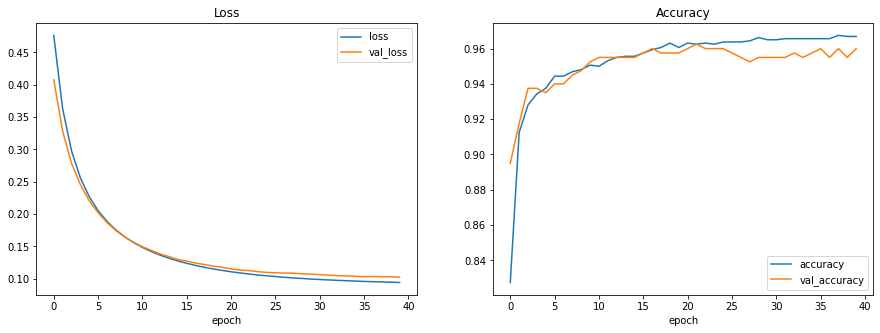

In [33]:
loss = history.history['loss']
accuracy = history.history['binary_accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_binary_accuracy']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.subplot(122)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

Tarea: Con los mismos pasos anteriores realzar clasificación sobre la base de datos MNIST de digitos.



In [34]:
#En base a trabajo de https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras/notebook
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()




unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


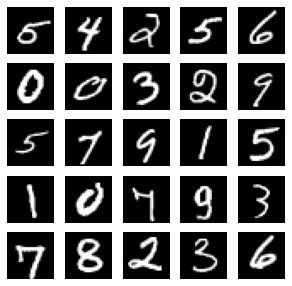

In [35]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [37]:
num_labels = len(np.unique(y_train))


In [38]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [40]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [41]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [42]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

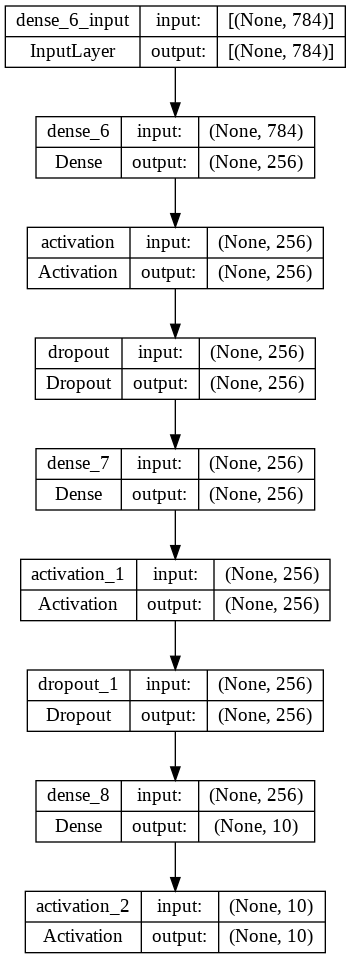

In [44]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)#visualizar como esta construido el modelo

In [46]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)#training

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.4185 - accuracy: 0.8711
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1961 - accuracy: 0.9416
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1522 - accuracy: 0.9544
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1276 - accuracy: 0.9611
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1142 - accuracy: 0.9659
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1051 - accuracy: 0.9671
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0958 - accuracy: 0.9703
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0885 - accuracy: 0.9720
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0835 - accuracy: 0.9736
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0793 - accuracy: 0.97

In [49]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9813

Test accuracy: 98.1%


Con lo cual se muestra que el modelo tiene una acertamiento del 98.1%

Visualizacion utilizando t-sne

Text(0.5, 1.0, 'Label 8')

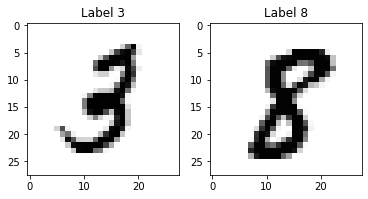

In [91]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
 
# Load the MNIST data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
 
# Randomly select 1000 samples for performance reasons
np.random.seed(100)
subsample_idc = np.random.choice(X.shape[0], 1000, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]
 
# Show two example images
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[11,:].reshape(28,28), 'Greys')
ax[1].imshow(X[15,:].reshape(28,28), 'Greys')
ax[0].set_title("Label 3")
ax[1].set_title("Label 8")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


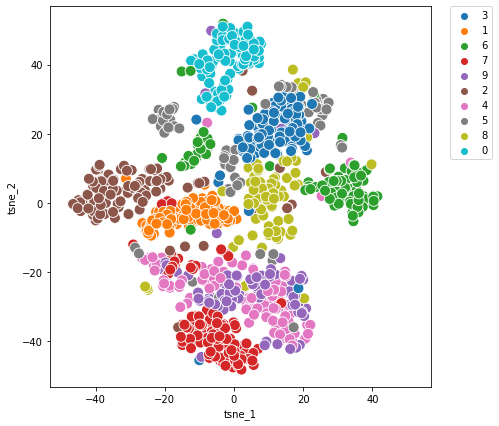

In [93]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)